In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load your data
df = pd.read_csv("Questions_Answers_DataFrame.csv")

# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Preprocess and compute embeddings
true_answers = df["True Answer"].apply(str.strip).tolist()
no_rag_answers = df["No RAG Answer"].apply(str.strip).tolist()
rag_answers = df["RAG Answer"].apply(str.strip).tolist()

true_embeddings = model.encode(true_answers, convert_to_tensor=True)
no_rag_embeddings = model.encode(no_rag_answers, convert_to_tensor=True)
rag_embeddings = model.encode(rag_answers, convert_to_tensor=True)

# Calculate semantic similarity
no_rag_similarity = util.cos_sim(true_embeddings, no_rag_embeddings).diag().tolist()
rag_similarity = util.cos_sim(true_embeddings, rag_embeddings).diag().tolist()

# Calculate error ratings
no_rag_error = [1 - sim for sim in no_rag_similarity]
rag_error = [1 - sim for sim in rag_similarity]

# Add results back to the dataframe
df["No RAG Similarity"] = no_rag_similarity
df["No RAG Error"] = no_rag_error
df["RAG Similarity"] = rag_similarity
df["RAG Error"] = rag_error

# Save the updated dataframe
df.to_csv("Error_Ratings_DataFrame.csv", index=False)


c:\Users\Seb_R\HA(IT) - Programmering Projekter\QRM_LLM_Scraper\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Seb_R\HA(IT) - Programmering Projekter\QRM_LLM_Scraper\.venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Seb_R\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either nee

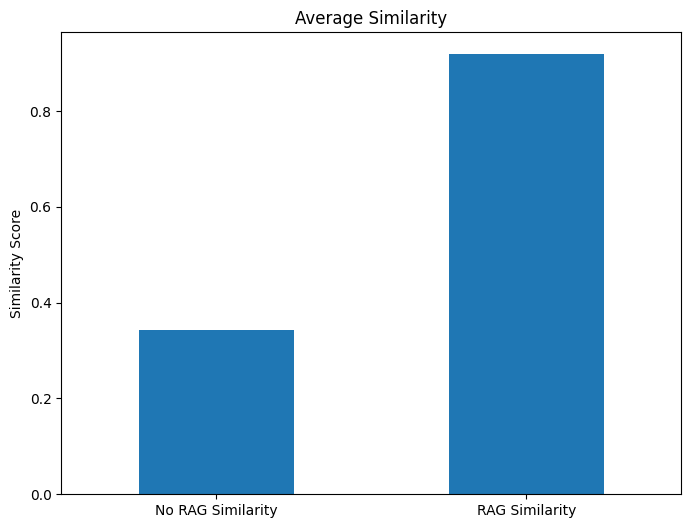

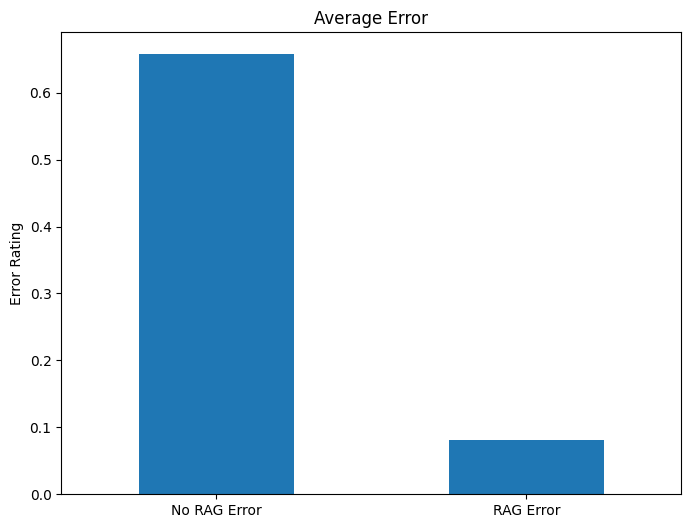

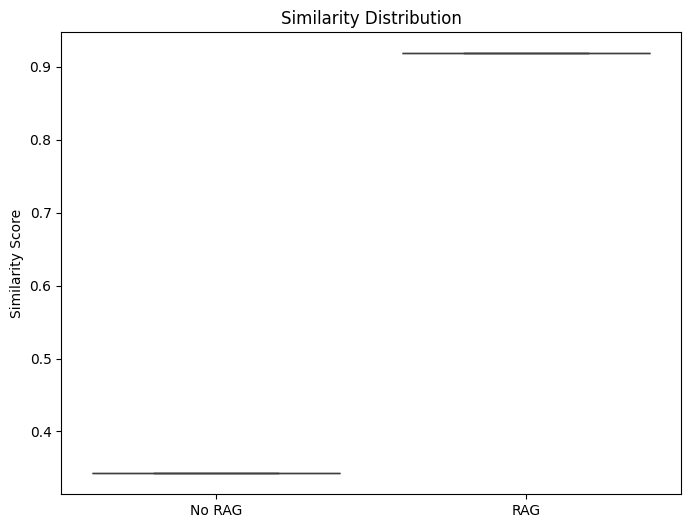

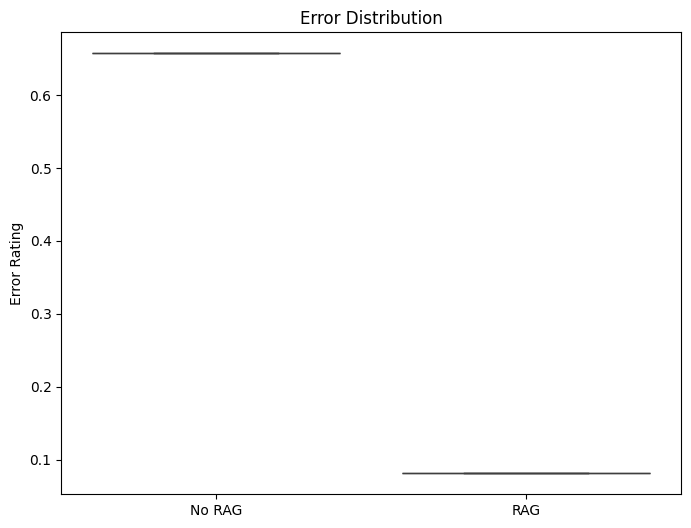

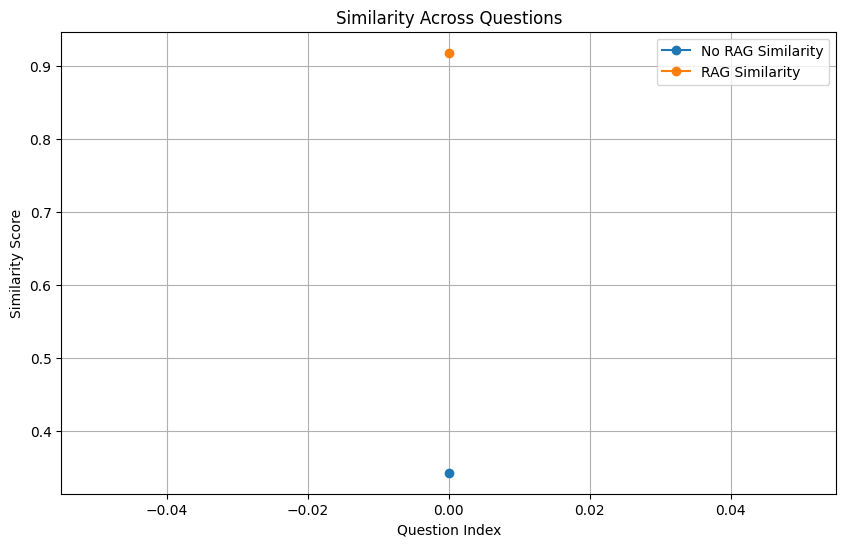

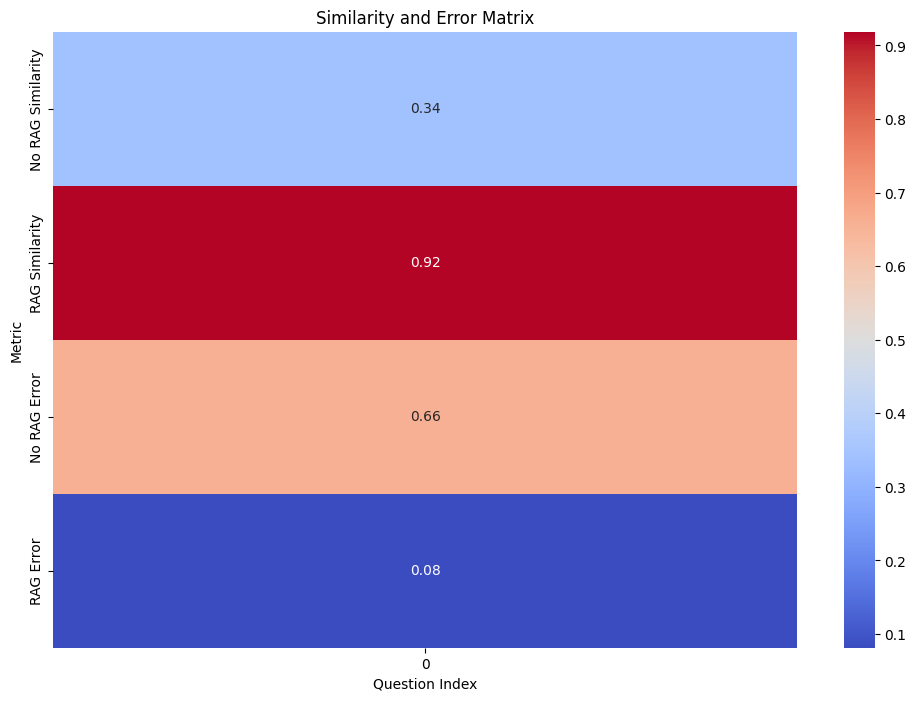

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("Error_Ratings_DataFrame.csv")

# 1. Bar Chart: Average Similarity and Error
average_similarity = df[["No RAG Similarity", "RAG Similarity"]].mean()
average_error = df[["No RAG Error", "RAG Error"]].mean()

plt.figure(figsize=(8, 6))
average_similarity.plot(kind='bar', title="Average Similarity", ylabel="Similarity Score")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
average_error.plot(kind='bar', title="Average Error", ylabel="Error Rating")
plt.xticks(rotation=0)
plt.show()

# 2. Box Plot: Distribution of Similarities and Errors
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["No RAG Similarity", "RAG Similarity"]])
plt.title("Similarity Distribution")
plt.ylabel("Similarity Score")
plt.xticks([0, 1], ["No RAG", "RAG"])
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["No RAG Error", "RAG Error"]])
plt.title("Error Distribution")
plt.ylabel("Error Rating")
plt.xticks([0, 1], ["No RAG", "RAG"])
plt.show()

# 3. Line Chart: Similarity vs. Questions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["No RAG Similarity"], label="No RAG Similarity", marker="o")
plt.plot(df.index, df["RAG Similarity"], label="RAG Similarity", marker="o")
plt.title("Similarity Across Questions")
plt.xlabel("Question Index")
plt.ylabel("Similarity Score")
plt.legend()
plt.grid()
plt.show()

# 4. Heatmap: Similarity/Error Matrix
heatmap_data = df[["No RAG Similarity", "RAG Similarity", "No RAG Error", "RAG Error"]]
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Similarity and Error Matrix")
plt.xlabel("Question Index")
plt.ylabel("Metric")
plt.show()
